In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Mohammed/Downloads/Combined_Funda_data.csv")

In [3]:
df = df.drop(columns=["Aangeboden sinds", "Vraagprijs per m²", "Status", "Gelegen op",
                     "Zijtuin", "Bouwperiode", "Looptijd", "Toegankelijkheid", "Keurmerken",
                     "Specifiek", "Oppervlakte", "Eigendomssituatie"])

In [5]:
# Clean the "Laatste vraagprijs" column to handle complex values like "€ 2.330.000 vrij op naam"
df['Laatste vraagprijs'] = (
    df['Laatste vraagprijs']
    .str.replace('€', '', regex=False)  # Remove the euro symbol
    .str.replace('vrij op naam', '', case=False, regex=False)  # Remove text like 'vrij op naam'
    .str.replace(r'[^\d.,]', '', regex=True)  # Keep only digits, commas, and dots
    .str.replace(',', '')  # Remove commas
    .str.replace('.', '', regex=False)  # Remove dots
    .str.strip()  # Remove leading/trailing whitespace
)

# Convert valid entries to float, filling invalid ones with NaN
df['Laatste vraagprijs'] = pd.to_numeric(df['Laatste vraagprijs'], errors='coerce')

# Fill missing values (NaN) with the mean of the column
df['Laatste vraagprijs'] = df['Laatste vraagprijs'].fillna(df['Laatste vraagprijs'].mean())

# Convert the column to integer
df['Laatste vraagprijs'] = df['Laatste vraagprijs'].astype(int)

In [42]:
df['Overige inpandige ruimte'] = df['Overige inpandige ruimte'].str.extract(r'(\d+)')[0].astype(float).fillna(0).astype(int)

In [44]:
import numpy as np

# Extract the first one or two digits, convert to float, and fill missing values with the mean
df['Aantal kamers'] = df['Aantal kamers'].str.extract(r'(\d{1,2})')[0].astype(float)  # Extract one or two digits and convert to float
df['Aantal kamers'] = df['Aantal kamers'].fillna(df['Aantal kamers'].mean()).astype(int)  # Impute missing values with mean and convert to int

In [46]:
import pandas as pd
import numpy as np

# Extract numeric part, convert to float, and fill missing values with the mean
df['Wonen'] = df['Wonen'].str.extract(r'(\d+)')[0].astype(float)  # Extract numbers and convert to float
df['Wonen'] = df['Wonen'].fillna(df['Wonen'].mean()).astype(int)   # Impute missing values with mean and convert to int

In [48]:
# Extract numeric part, replace commas with dots, convert to float, fill missing values with 0, and then convert to integer
df['Bijdrage VvE'] = df['Bijdrage VvE'].str.extract(r'(\d+[\.,]?\d*)')[0].str.replace(',', '.').astype(float).fillna(0).astype(int)

In [50]:
df['Capaciteit'] = df['Capaciteit'].str.extract(r'(\d+)')[0].astype(float).fillna(0).astype(int)

In [52]:
# Clean the "Inhoud" column to retain only numbers and convert to integer
df['Inhoud'] = (
    df['Inhoud']
    .str.extract(r'(\d+)')  # Extract the first sequence of digits
    [0]  # Extract the first capture group
    .astype(float)  # Convert to float to handle missing values
    .fillna(0)  # Fill missing values with 0
    .astype(int)  # Convert to integer
)

In [55]:
# Clean the "Perceel" column by extracting numbers
df['Perceel'] = df['Perceel'].str.extract(r'(\d+)')[0].astype(float)

# Replace missing values in "Perceel" with corresponding values from "Wonen"
df['Perceel'] = df['Perceel'].fillna(df['Wonen'])

# Convert the column to integer data type
df['Perceel'] = df['Perceel'].astype(int)

In [67]:
# List of features to clean and process
features_to_clean = ["Gebouwgebonden buitenruimte", "Externe bergruimte"]

# Function to clean and convert the columns
def clean_numeric_features(df, columns):
    for column in columns:
        # Extract numbers from the column
        df[column] = df[column].str.extract(r'(\d+)')[0].astype(float)
        # Fill missing values with 0 and convert to integer
        df[column] = df[column].fillna(0).astype(int)

# Apply the cleaning function to the specified features
clean_numeric_features(df, features_to_clean)

# Verify the transformation
print(df[features_to_clean].head())

   Gebouwgebonden buitenruimte  Externe bergruimte
0                            0                   0
1                            0                   5
2                            0                   0
3                            0                   0
4                            0                   0


In [69]:
df.to_csv('processed_dataset_CAT.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv("C:/Users/Mohammed/Downloads/processed_dataset_CAT.csv")

In [7]:
# Identify categorical variables
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values with "Unknown"
for col in categorical_features:
    df[col] = df[col].fillna("Unknown")

# Verify the changes
print(df[categorical_features].isnull().sum())  # Should return 0 for all categorical features

Verkoopdatum                0
Soort appartement           0
Soort bouw                  0
Soort dak                   0
Aantal badkamers            0
Badkamervoorzieningen       0
Aantal woonlagen            0
Voorzieningen               0
Energielabel                0
Isolatie                    0
Verwarming                  0
Warm water                  0
Ligging                     0
Balkon/dakterras            0
Schuur/berging              0
Soort parkeergelegenheid    0
Inschrijving KvK            0
Jaarlijkse vergadering      0
Periodieke bijdrage         0
Reservefonds aanwezig       0
Onderhoudsplan              0
Opstalverzekering           0
Soort woonhuis              0
Cv-ketel                    0
Tuin                        0
Achtertuin                  0
Ligging tuin                0
Soort garage                0
dtype: int64


In [55]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare the dataset
target_variable = "Laatste vraagprijs"
X = df.drop(columns=[target_variable])  # Features
y = np.sqrt(df[target_variable])  # Apply square root transformation to the target variable

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Perform train-test split (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
catboost_model = CatBoostRegressor()

# Define hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.1, 0.5, 1],
    'random_strength': [0.5, 1, 2],
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_iter=20,
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit the model with categorical features specified
random_search.fit(X_train, y_train, cat_features=categorical_features, verbose=0)

# Best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print("Best Parameters:", random_search.best_params_)
print("CatBoost Regressor Performance After Hyperparameter Tuning:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Best Parameters: {'random_strength': 0.5, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 8, 'bagging_temperature': 0.5}
CatBoost Regressor Performance After Hyperparameter Tuning:
Mean Squared Error (MSE): 6012.31
Mean Absolute Error (MAE): 56.45
Mean Absolute Percentage Error (MAPE): 8.89%


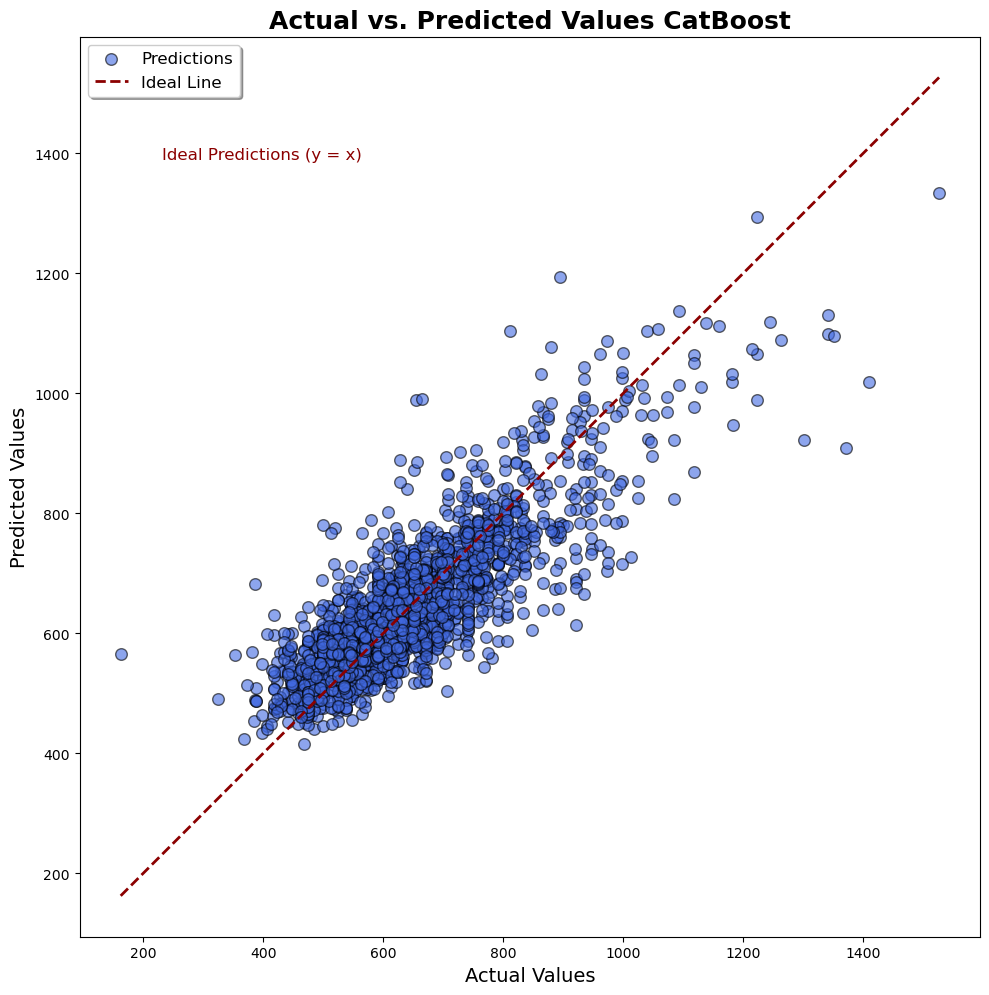

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 12))
plt.scatter(y_test, y_pred, alpha=0.6, color="royalblue", edgecolor='black', label="Predictions", s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="darkred", linestyle="--", label="Ideal Line", linewidth=2)

# Add gridlines and transparency for a cleaner look
plt.grid(alpha=0)

# Customize title and axis labels
plt.title("Actual vs. Predicted Values CatBoost", fontsize=18, weight='bold')
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)

# Add a 45-degree diagonal line annotation
plt.text(min(y_test) + (max(y_test) - min(y_test)) * 0.05, 
         max(y_test) - (max(y_test) - min(y_test)) * 0.1, 
         "Ideal Predictions (y = x)", color="darkred", fontsize=12)

# Add legend and custom style
plt.legend(loc="upper left", fontsize=12, frameon=True, shadow=True)

# Add aspect ratio to make the diagonal line match perfectly
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig("catboost_actual_predict.png", dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Select 5 random instances from the test set
random_instances = X_test.sample(5, random_state=42)

# Use the CatBoost Regressor to predict these instances
predicted_values = best_model.predict(random_instances)

# Actual values for these instances
actual_values = y_test.loc[random_instances.index]

# Combine into a DataFrame for easy comparison
results = pd.DataFrame({
    "Actual Value (Transformed)": actual_values,
    "Predicted Value (Transformed)": predicted_values
}, index=random_instances.index)

# Print the results
print(results)

      Actual Value (Transformed)  Predicted Value (Transformed)
447                   773.950903                     805.008087
5813                  474.341649                     470.287141
2039                  670.074623                     670.567111
221                   558.569602                     558.997707
4609                  628.490254                     852.825913


                     Feature  Importance
5                      Wonen   18.579226
21  Soort parkeergelegenheid    8.170142
28            Soort woonhuis    6.362192
15                  Isolatie    4.780907
8                     Inhoud    4.365486
32                      Tuin    4.116072
10          Aantal badkamers    3.910793
11     Badkamervoorzieningen    3.650375
14              Energielabel    3.389499
30                   Perceel    3.343690


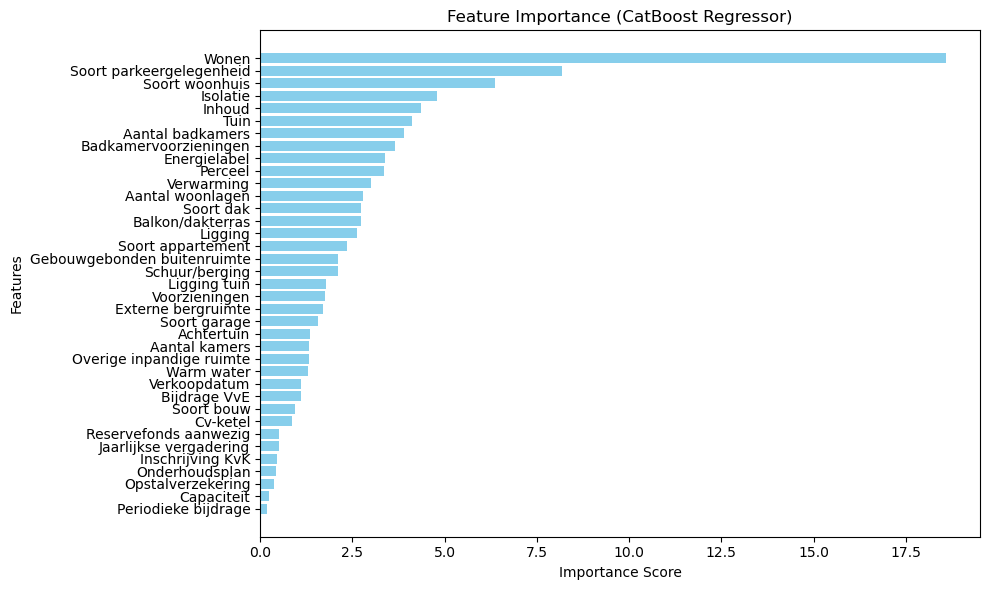

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the CatBoost model
feature_importances = best_model.get_feature_importance(type="FeatureImportance")

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title("Feature Importance (CatBoost Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("catboost_feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

In [34]:
# Identify the top 10 most contributing features (example list from analysis)
top_10_features = ["Wonen", "Soort parkeergelegenheid", "Soort woonhuis", 
                   "Isolatie", "Inhoud", "Aantal badkamers", 
                   "Tuin", "Verwarming", "Perceel", "Badkamervoorzieningen"]

# Initialize the CatBoost Regressor with the optimal hyperparameters
catboost_model_optimized = CatBoostRegressor(
    random_strength=0.5,
    learning_rate=0.05,
    l2_leaf_reg=5,
    iterations=1500,
    depth=8,
    bagging_temperature=0.5,
    verbose=0
)

# Drop the top 10 contributing features from the dataset
X_dropped_optimized = X.drop(columns=top_10_features)

# Perform train-test split (80/20 split) after dropping features
X_train_dropped_optimized, X_test_dropped_optimized, y_train, y_test = train_test_split(
    X_dropped_optimized, y, test_size=0.2, random_state=42
)

# Fit the model with categorical features specified
catboost_model_optimized.fit(
    X_train_dropped_optimized,
    y_train,
    cat_features=[col for col in categorical_features if col not in top_10_features]
)

# Make predictions on the test set
y_pred_dropped_optimized = catboost_model_optimized.predict(X_test_dropped_optimized)

# Evaluate the model
mse_dropped_optimized = mean_squared_error(y_test, y_pred_dropped_optimized)
mae_dropped_optimized = mean_absolute_error(y_test, y_pred_dropped_optimized)
mape_dropped_optimized = np.mean(np.abs((y_test - y_pred_dropped_optimized) / y_test)) * 100

# Prepare results for display
results_dropped_optimized = {
    "MSE": mse_dropped_optimized,
    "MAE": mae_dropped_optimized,
    "MAPE (%)": mape_dropped_optimized
}

results_dropped_optimized

{'MSE': 10552.13716254449,
 'MAE': 74.88992539585429,
 'MAPE (%)': 11.711068487259947}